# Variabilité d'une grandeur pour estimer son incertitude type

Ce notebook vise à illustrer des calculs que vous ferez très fréquemment en TP de physique, gardez-le donc sous le coude pour vous en inspirer au besoin: on ne vous demande pas de retenir par cœur la syntaxe, en revanche, on vous demande d'être capable de l'adapter au cas que vous allez traiter en TP.

La première section explique les notions, la seconde est l'énoncé proprement dit de ce que vous devez faire. La réponse à la question posée doit être stockée dans la variable `reponse` (ATTENTION: pas d'accent ! Voyez dans la dernière case de ce notebook).

ATTENTION (bis), au moment de rendre ce travail, assurez-vous bien qu'une exécution via "Noyau -> Redémarrer & tout exécuter" vous donne bien le résultat attendu. Cf la vidéo qui explique comment prendre en main un notebook.


## Première partie: exemple de syntaxe

Vous avez vu en cours de physique qu'à toute grandeur $x$ mesurée peut être associée une valeur $u(x)$ appelée «incertitude-type» qui traduit le fait que lors d'une série de mesure on aura une certaine variabilité des résultats mesurées: $u(x)$ correspond à l'écart-type de la distribution des valeurs de $x$.

Supposons que l'on se donne une longueur $x = 1{,}234~$m dont les mesures répétées donnent un écart-type $u(x) = 0{,}2~$m. Le bloc suivant permet de simuler un million de mesures (`N = 10**6`) prises aléatoirement en suivant une distribution gaussienne, dite distribution normale (`rd.normal`) de valeur moyenne $x = 1{,}234~$m (premier argument de `rd.normal`) et d'écart-type $u(x) = 0{,}2~$m (deuxième argument de `rd.normal`), le tout stocké dans le `np.array` appelé `X`.

Pour la forme, on vérifie que l'application de la moyenne (par la méthode `mean`) et de l'écart-type (par la méthode `std` pour «standard déviation»), ce qui redonne effectivement (à quelques pouillièmes près) les deux valeurs que l'on a rentré au départ (ouf!)


In [1]:
import numpy as np        # Importation de numpy
import numpy.random as rd # Le sous-module pour les tirages aléatoires

N = 10**6 # Nombre de valeurs tirées

x = 1.234
ux= 0.2
X = rd.normal(x, ux, N)

print("Vérifications...")
print("Moyenne de X:   ", X.mean())
print("Écart-type de X:", X.std())


Vérifications...
Moyenne de X:    1.2343613986230246
Écart-type de X: 0.200049149869844


Procédons aussi à une analyse graphique pour voir la distribution sous forme d'un histogramme des valeurs, c'est-à-dire pour un certain nombre d'intervalle de valeurs de $x$, le nombre de mesures qui se sont justement retrouvées dans cet intervalle. On retrouve la forme en cloche caractéristique d'une gaussienne, avec une largeur à mi-hauteur qui correspond au fameux écart-type.

Text(0.5, 1.0, 'Histogramme des valeurs simulées pour $x$')

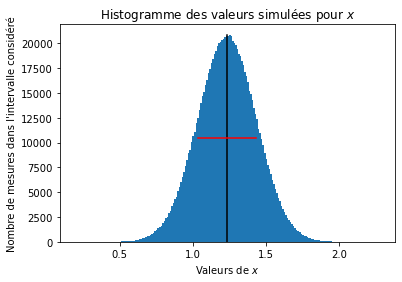

In [2]:
import matplotlib.pyplot as plt # pour les représentation graphiques

# bins = 'rice' permet de donner une bonne tête à l'histogramme
# L'histogramme en lui-même est calculé automatiquement par plt.hist
# On récupère les valeurs additionnées dans n, 
# l'histogramme étant une représentation de n en fonction de bins
n, bins, patches  = plt.hist(X, bins = 'rice') 

Xm = X.mean()
uX = X.std()
nMax = max(n)
# Position de la moyenne en noir ('k')
plt.plot([Xm, Xm], [0, nMax], 'k')
# Vérification de largeur à mi-hauteur en rouge ('r')
plt.plot([Xm - uX, Xm + uX], [nMax / 2, nMax / 2], 'r')

plt.xlabel('Valeurs de $x$')
plt.ylabel("Nombre de mesures dans l'intervalle considéré")
plt.title("Histogramme des valeurs simulées pour $x$")

Supposons à présent que l'on ait une autre longueur $y = 2{,}45~$m avec une incertitude-type de $u(y)=0{,}53~$m. On veut déterminer l'aire du rectangle dont les côtés valent respectivement $x$ et $y$ et surtout l'incertitude-type sur l'aire correspondante. On fait donc un tirage de valeurs de $y$ en plus du tirage des valeurs de $x$ dont on dispose déjà et on crée une nouvelle variable qui va contenir tous les calculs d'aire pour toutes les valeurs tirées aléatoirement dans cette simulation. On peut alors regarder la tête de la distribution des aires et calculer la moyenne et l'écart-type correspondant.

Résultats...
Aire moyenne:			 3.02529409808973 m^2
Incertitude-type:		 0.8239671893406112 m^2
Aire attendue:			 3.0233000000000003 m^2
Propagation d'incertitude:	 0.817216103855033 m^2


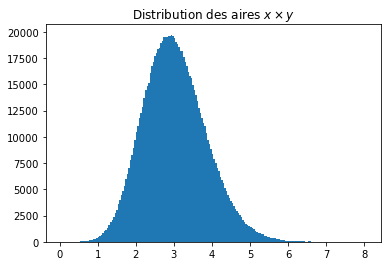

In [3]:
y = 2.45
uy= 0.53
Y = rd.normal(y, uy, N)  # Tirage des N valeurs de y

aire = X * Y

plt.hist(aire, bins = 'rice')
plt.title('Distribution des aires $x\\times y$')

aire_moyenne = aire.mean()
u_aire = aire.std()

print('Résultats...')
print('Aire moyenne:\t\t\t', aire_moyenne, 'm^2')
print('Incertitude-type:\t\t', u_aire, 'm^2')

# Comparaison avec la formule de propagation des incertitudes:

u_propagation = x * y * np.sqrt( (ux / x)**2 + (uy / y)**2 )

print('Aire attendue:\t\t\t', x * y, 'm^2')
print("Propagation d'incertitude:\t", u_propagation, 'm^2')


Comme on le voit avec les calculs précédents, on retrouve bien l'ordre de grandeur de la valeur prédite par la formule de propagation d'incertitude qui dit que, pour $A = xy$, 
$$\frac{u(A)}{A} = \sqrt{
        \left(\frac{u(x)}{x}\right)^{\!\!2} +
        \left(\frac{u(y)}{y}\right)^{\!\!2}
        }$$

## Deuxième partie: à vous de jouer !

À présent que les grandes lignes sont tracées, on va vous demander de faire le travail par vous-même. Dans le répertoire de ce notebook, il y a un fichier `donnees.py` qui définit les valeurs de `x`, `y`, `ux` et `uy` ainsi que la fonction `grandeur(x, y)` qui est la grandeur calculée à partir des valeurs mesurées $x$ et $y$. On impose aussi la valeur `N` du nombre de tirages à effectuer.
Vous pouvez donc utiliser ces valeurs comme si vous les aviez définies vous-même dans la suite de cette cellule Python. Attention néanmoins, ne vous amusez pas à modifier le fichier `donnees.py` car il sera écrasé par un fichier contenant des valeurs (et définition) différentes lors de l'évaluation de votre notebook.

En utilisant les notions expliquées dans la section précédente, stockez dans la variable `reponse` (SANS ACCENT) la valeur de l'incertitude-type pour la grandeur calculée à partir de $x$ et $y$.

In [4]:
# Import des variables `x`, `ux`, `y` et `uy` 
# ainsi que de la fonction `grandeur` qui attend deux arguments 
# (`x` et `y`).
# La valeur du nombre `N` de simulation est aussi imposée et doit être
# utilisée comme dans l'exemple plus haut.
from donnees import *

# À vous de jouer ! 

print("Valeurs de x et y:", x, "et", y)

# Changez ce qu'il y a du côté droit de l'égalité suivante
# en y mettant l'incertitude-type pour `grandeur(x, y)`

reponse = "À changer..."

print("Votre réponse pour le moment:", reponse)


Valeurs de x et y: 34.56 et 0.765
Votre réponse pour le moment: À changer...
